## importing the libraries

In [1]:
!pip install tensorflow

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

2024-05-25 00:21:15.754690: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 00:21:15.809927: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 00:21:15.809978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 00:21:15.811449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 00:21:15.819718: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 00:21:15.820166: I tensorflow/core/platform/cpu_feature_guard.cc:1

## loading data

In [4]:
image_caries = "/home/zainab/Downloads/TOOTH_CLASSIFICATION/teeth_dataset/teeth_dataset/Trianing/caries"
image_wcaries = "/home/zainab/Downloads/TOOTH_CLASSIFICATION/teeth_dataset/teeth_dataset/Trianing/without_caries"

image_list = []
count = 0

for filename in os.listdir(image_wcaries):
    if count == 19:
        break
    try:
        img = cv.imread(f"/home/zainab/Downloads/TOOTH_CLASSIFICATION/teeth_dataset/teeth_dataset/Trianing/without_caries/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error: {e}')
print(len(image_list))

for image in os.listdir(image_caries):
    if count == 75:
        break
    try:
        img2 = cv.imread(f"/home/zainab/Downloads/TOOTH_CLASSIFICATION/teeth_dataset/teeth_dataset/Trianing/caries/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

print(len(image_list))

19
74


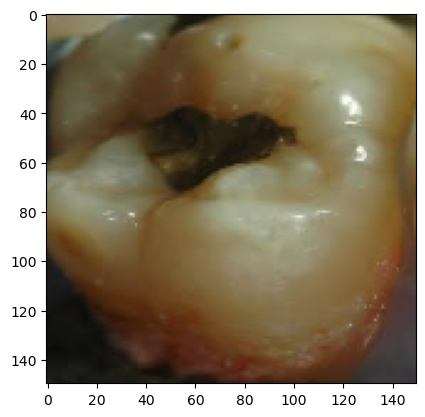

In [5]:
plt.imshow(image_list[59][:,:,::-1])

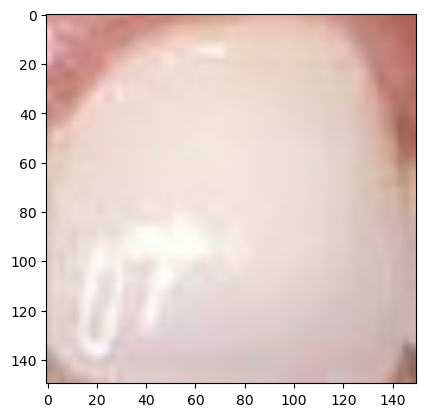

In [6]:
plt.imshow(image_list[14][:,:,::-1])

## creating labels

Label for caries = 1
Label for no_caries = 0

In [7]:
label_list = []
for i in range(19):
    label_list.append(0)
for j in range(74):
    label_list.append(1)

In [8]:
label_list[14]

0

In [9]:
label_list[73]

1

## randomizing labels and images

In [10]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

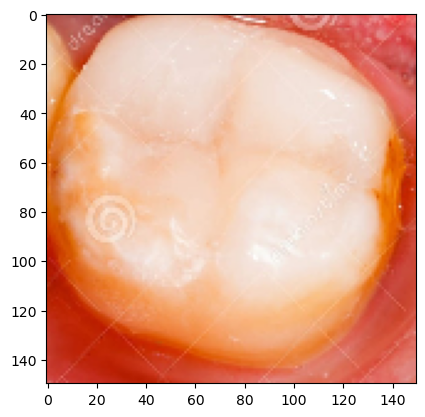

In [11]:
plt.imshow(shuffled_images[47][:,:,::-1])

In [12]:
shuffled_labels[20]

1

In [13]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [14]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.3)

In [15]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.3)

## augmentation data model

In [16]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [17]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## DCNN model

In [18]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                             

In [49]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=200, callbacks=callback)

Epoch 1/200
2/2 [==============================] - 1s 504ms/step - loss: 0.0732 - accuracy: 0.9608 - val_loss: 0.1345 - val_accuracy: 0.9375
Epoch 2/200
2/2 [==============================] - 1s 450ms/step - loss: 0.0961 - accuracy: 0.9608 - val_loss: 0.1155 - val_accuracy: 0.9375
Epoch 3/200
2/2 [==============================] - 1s 340ms/step - loss: 0.0522 - accuracy: 0.9804 - val_loss: 0.0828 - val_accuracy: 0.9375
Epoch 4/200
2/2 [==============================] - 1s 344ms/step - loss: 0.0880 - accuracy: 0.9608 - val_loss: 0.0959 - val_accuracy: 0.9375
Epoch 5/200
2/2 [==============================] - 1s 342ms/step - loss: 0.1201 - accuracy: 0.9608 - val_loss: 0.0738 - val_accuracy: 0.9375
Epoch 6/200
2/2 [==============================] - 1s 333ms/step - loss: 0.0637 - accuracy: 0.9608 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 7/200
2/2 [==============================] - 1s 339ms/step - loss: 0.1026 - accuracy: 0.9804 - val_loss: 0.0821 - val_accuracy: 0.9375
Epoch 8/200
2

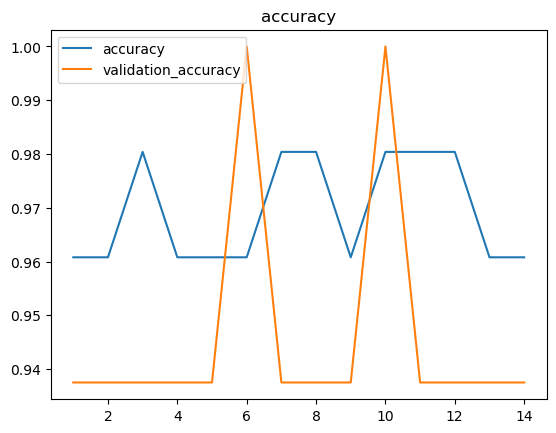

In [70]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

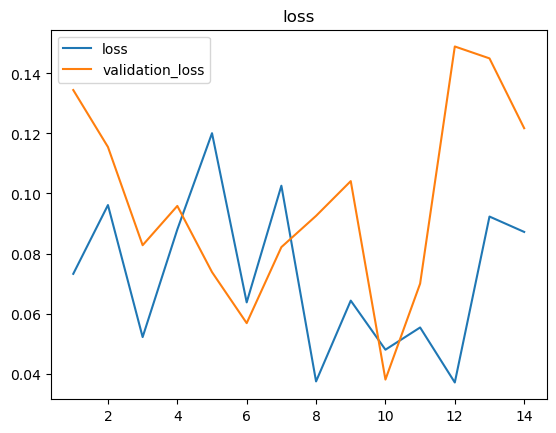

In [71]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [72]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 0.7652 - accuracy: 0.7391


[0.7651950716972351, 0.739130437374115]

In [73]:
y_pred = model.predict(x_test)
class_label = (y_pred > 0.5).astype(int)


1/1 [==============================] - 0s 84ms/step


In [74]:
y_test[5]

1

In [75]:
print(class_label[5])

[1]


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

true_labels = y_test
predicted_labels = class_label

#confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")


#precision
precision = precision_score(true_labels, predicted_labels)
print(f"Precision: {precision:.2f}")

#recall
recall = recall_score(true_labels, predicted_labels)
print(f"Recall: {recall:.2f}")

# f1 Score
f1 = f1_score(true_labels, predicted_labels)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.74
Precision: 1.00
Recall: 0.68
F1 Score: 0.81


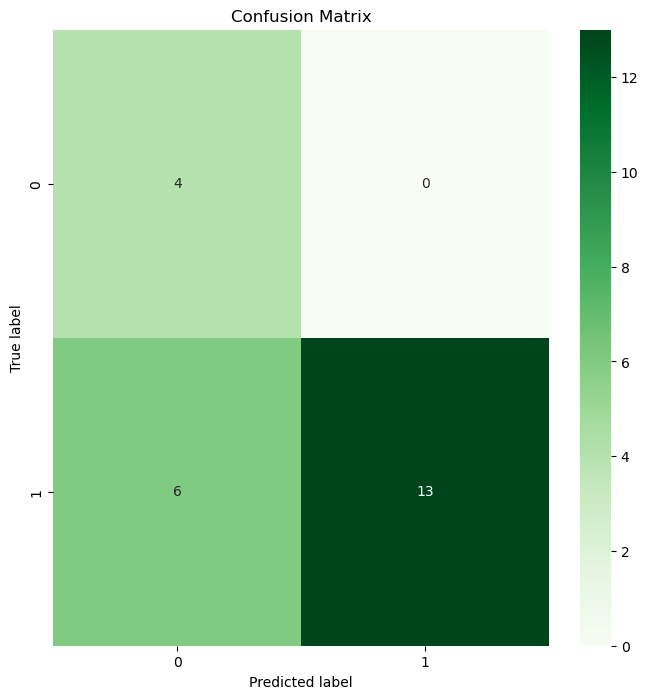

In [77]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()